#Machine Learning and FinTech 2024/25
##Homework 1014 reference answer
By TA, Chan Nok Hang

| Name   | INDEX    | Question                             |
|--------|----------|--------------------------------------|
| Pinyo  | HW1014Q1 | Ch03_Q13 in page 133 (regression)    |
| Hampus | HW1014Q2 | Ch03_Q14 in page 132 (regression)    |
| Ben    | HW1014Q3 | Ch03_Q15 in page 131 (regression)    |


#Ch3 q13
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

##(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [1]:
import numpy as np

# Set the random seed for consistent results
np.random.seed(1)

# Create a vector x with 100 observations drawn from a N(0,1) distribution
x = np.random.normal(0, 1, 100)
x[:10]  # Display the first 10 values to check the data


array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

## (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [2]:
# Create a vector eps with 100 observations drawn from a N(0, 0.25) distribution
eps = np.random.normal(0, np.sqrt(0.25), 100)
eps[:10]  # Display the first 10 values to check the data


array([-0.22356428,  0.61225385,  0.20174582,  0.29678926, -0.54745592,
        0.08469122,  0.37027823, -0.4768503 , -0.13310925,  0.01630727])

## (c)
Using x and eps, generate a vector y according to the model $$Y = -1+0.5X+\epsilon.  \tag{3.39}$$ What is the length of the vector y? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [3]:
# Generate the vector y according to the model Y = -1 + 0.5*X + eps
y = -1 + 0.5 * x + eps

# Get the length of y and the values of beta_0 and beta_1
y_length = len(y)
beta_0 = -1
beta_1 = 0.5

y[:10], y_length, beta_0, beta_1  # Display the first 10 values of y, the length of y, and beta coefficients


(array([-0.4113916 , -0.69362435, -1.06234006, -1.23969505, -1.11475211,
        -2.06607813,  0.24268411, -1.85745375, -0.9735897 , -1.10837791]),
 100,
 -1,
 0.5)

##(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

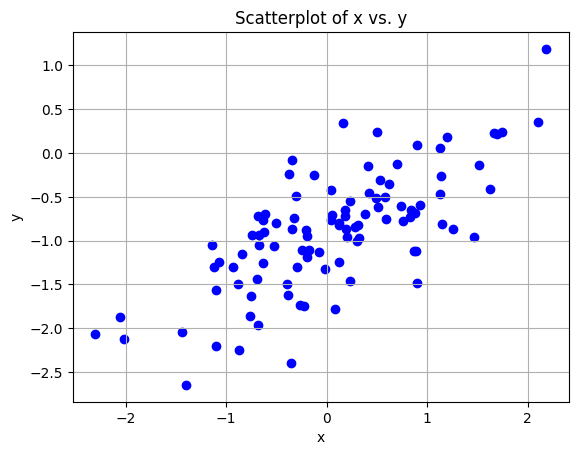

In [4]:
import matplotlib.pyplot as plt

# Create a scatterplot of x vs. y
plt.scatter(x, y, color='blue')
plt.title('Scatterplot of x vs. y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


##(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [6]:
from sklearn.linear_model import LinearRegression

# Reshape x for sklearn, which expects a 2D array
x_reshaped = x.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression().fit(x_reshaped, y)

# Get the estimated coefficients
beta_0_hat = model.intercept_
beta_1_hat = model.coef_[0]

beta_0_hat, beta_1_hat  # Display the estimated coefficients


(-0.926493235150899, 0.5477135668255857)

The least squares linear model to predict y using x yields the following estimated coefficients:
- $\hat\beta_0=−0.926$
- $\hat\beta_1=0.548$

Comparing these to the true coefficients:
- The true $\beta_0=-1$
- The true $\beta_1=0.5$

The estimated values are quite close to the true coefficients, indicating that the model fits the data well. The slight differences arise due to the random error term $\epsilon$.

## (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

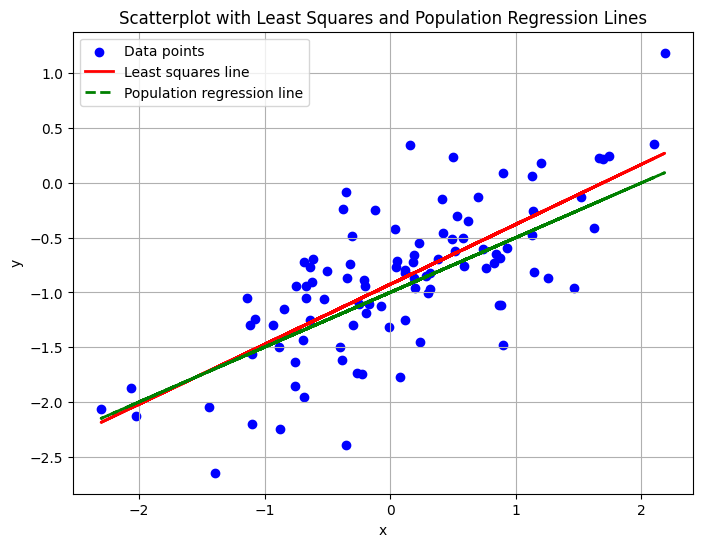

In [7]:
# Predicted values using the least squares line
y_pred = model.predict(x_reshaped)

# Scatterplot of the data
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the least squares line (fitted line)
plt.plot(x, y_pred, color='red', label='Least squares line', linewidth=2)

# Plot the population regression line (true line): Y = -1 + 0.5X
y_true = -1 + 0.5 * x
plt.plot(x, y_true, color='green', label='Population regression line', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Least Squares and Population Regression Lines')

# Add legend to differentiate the lines
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## (g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Reshape x into a 2D array
x_reshaped = x.reshape(-1, 1)

# Create polynomial features (x and x^2)
x_poly = PolynomialFeatures(degree=2).fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression().fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Fit a simple linear model for comparison
linear_model = LinearRegression().fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display R-squared values for both models
print(f"R-squared for linear model: {r2_linear}")
print(f"R-squared for polynomial (degree 2) model: {r2_poly}")

# Compare coefficients
print(f"Polynomial model intercept: {poly_model.intercept_}")
print(f"Polynomial model coefficients: {poly_model.coef_}")


R-squared for linear model: 0.5218387119375145
R-squared for polynomial (degree 2) model: 0.5220007118611886
Polynomial model intercept: -0.932508601420513
Polynomial model coefficients: [0.         0.54680981 0.0077113 ]


## (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is _less_ noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

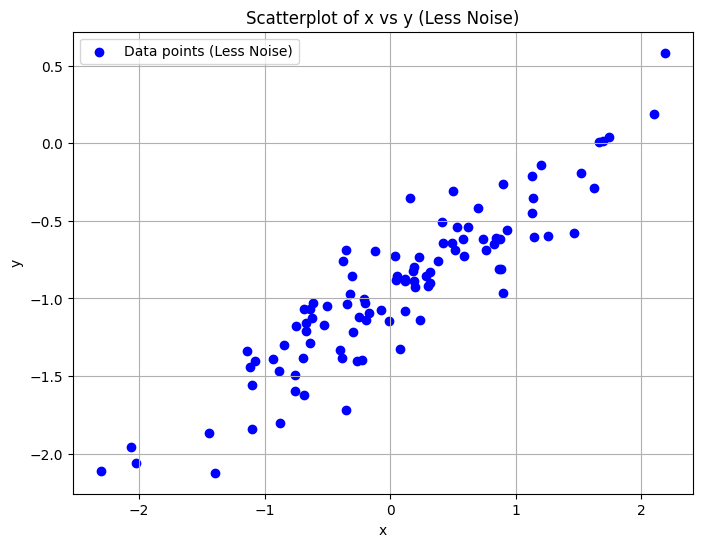

Linear Model:
Estimated beta0 (intercept): -0.9671267753982636
Estimated beta1 (slope): 0.5213381557741978
R-squared for linear model: 0.8317584338641365


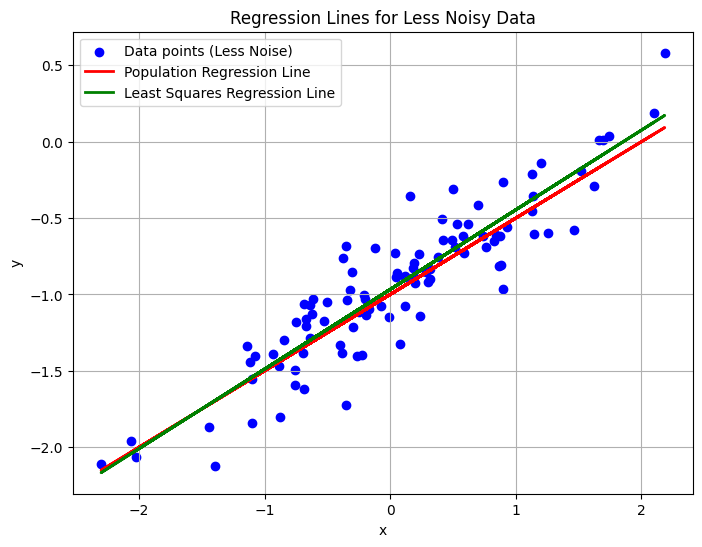

Polynomial Model:
Intercept: -0.9698169289759468
Coefficients: [0.         0.52093398 0.0034486 ]
R-squared for polynomial model: 0.8318154337124162
Comparison of R-squared values:
Linear R-squared: 0.8317584338641365
Polynomial R-squared: 0.8318154337124162


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from N(0, 1) for x
x = np.random.normal(0, 1, 100)

# Step 2: Generate eps from N(0, 0.05) (less noise)
eps = np.random.normal(0, np.sqrt(0.05), 100)

# Step 3: Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

# Calculate population y values for the population regression line
y_population = -1 + 0.5 * x

# Step 4: Create a scatterplot for the less noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (Less Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y (Less Noise)')
plt.grid(True)
plt.legend()
plt.show()

# Reshape x for modeling
x_reshaped = x.reshape(-1, 1)

# Step 5: Fit a least squares linear model
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display the estimated coefficients
beta0_hat = linear_model.intercept_
beta1_hat = linear_model.coef_[0]

print(f"Linear Model:\nEstimated beta0 (intercept): {beta0_hat}\nEstimated beta1 (slope): {beta1_hat}")
print(f"R-squared for linear model: {r2_linear}")

# Step 6: Create a second plot with both regression lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (Less Noise)')
plt.plot(x, y_population, color='red', label='Population Regression Line', linewidth=2)

# Plot the least squares line
plt.plot(x, y_linear_pred, color='green', label='Least Squares Regression Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines for Less Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Fit a polynomial regression model (degree 2) for comparison
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Display coefficients of the polynomial model
print(f"Polynomial Model:\nIntercept: {poly_model.intercept_}\nCoefficients: {poly_model.coef_}")
print(f"R-squared for polynomial model: {r2_poly}")

# Compare R-squared values
print(f"Comparison of R-squared values:\nLinear R-squared: {r2_linear}\nPolynomial R-squared: {r2_poly}")


## (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is _more_ noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

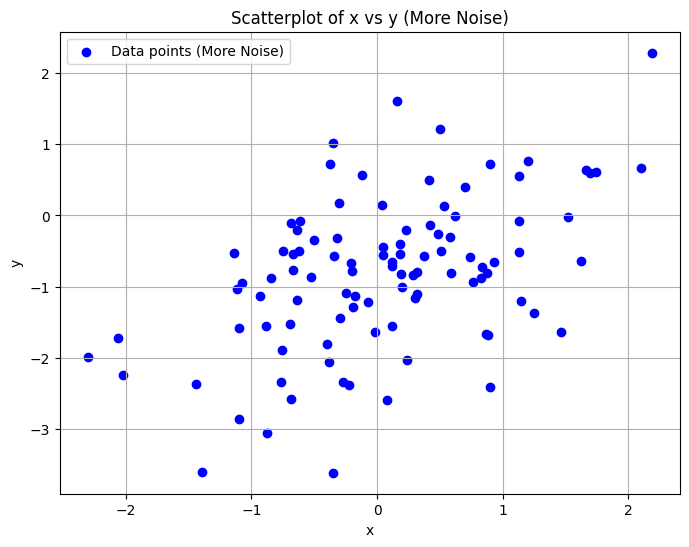

Linear Model:
Estimated beta0 (intercept): -0.8529864703017983
Estimated beta1 (slope): 0.5954271336511716
R-squared for linear model: 0.2438233943025615


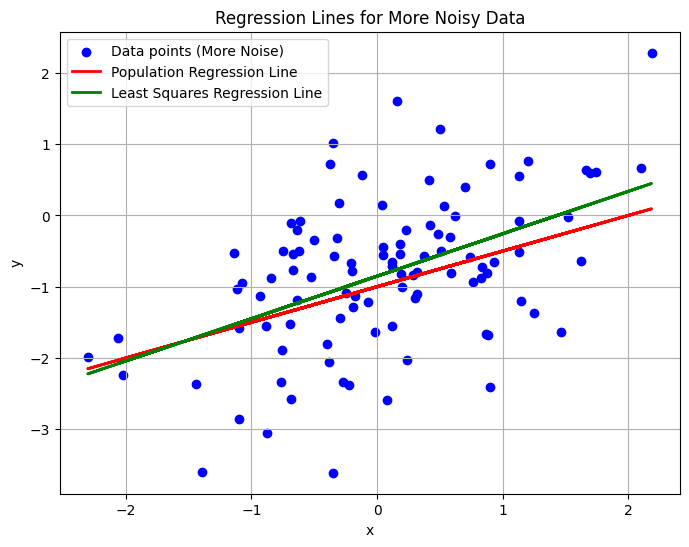

Polynomial Model:
Intercept: -0.8650172028410261
Coefficients: [0.         0.59361962 0.0154226 ]
R-squared for polynomial model: 0.24407958516423378
Comparison of R-squared values:
Linear R-squared: 0.2438233943025615
Polynomial R-squared: 0.24407958516423378


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from N(0, 1) for x
x = np.random.normal(0, 1, 100)

# Step 2: Generate eps from N(0, 1) (more noise)
eps = np.random.normal(0, np.sqrt(1), 100)  # Increase variance

# Step 3: Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

# Calculate population y values for the population regression line
y_population = -1 + 0.5 * x

# Step 4: Create a scatterplot for the more noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (More Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y (More Noise)')
plt.grid(True)
plt.legend()
plt.show()

# Reshape x for modeling
x_reshaped = x.reshape(-1, 1)

# Step 5: Fit a least squares linear model
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display the estimated coefficients
beta0_hat = linear_model.intercept_
beta1_hat = linear_model.coef_[0]

print(f"Linear Model:\nEstimated beta0 (intercept): {beta0_hat}\nEstimated beta1 (slope): {beta1_hat}")
print(f"R-squared for linear model: {r2_linear}")

# Step 6: Create a second plot with both regression lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (More Noise)')
plt.plot(x, y_population, color='red', label='Population Regression Line', linewidth=2)

# Plot the least squares line
plt.plot(x, y_linear_pred, color='green', label='Least Squares Regression Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines for More Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Fit a polynomial regression model (degree 2) for comparison
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Display coefficients of the polynomial model
print(f"Polynomial Model:\nIntercept: {poly_model.intercept_}\nCoefficients: {poly_model.coef_}")
print(f"R-squared for polynomial model: {r2_poly}")

# Compare R-squared values
print(f"Comparison of R-squared values:\nLinear R-squared: {r2_linear}\nPolynomial R-squared: {r2_poly}")


 ## (j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [13]:
import numpy as np
import statsmodels.api as sm

# Function to fit linear model and get confidence intervals
def get_confidence_intervals(x, y):
    # Add a constant for the intercept
    x = sm.add_constant(x)

    # Fit the linear model
    model = sm.OLS(y, x).fit()

    # Get confidence intervals
    return model.params, model.conf_int()

# Original Dataset
np.random.seed(1)
x_original = np.random.normal(0, 1, 100)
eps_original = np.random.normal(0, np.sqrt(0.25), 100)  # Variance 0.25
y_original = -1 + 0.5 * x_original + eps_original

beta_original, ci_original = get_confidence_intervals(x_original, y_original)

# Noisier Dataset
eps_noisier = np.random.normal(0, np.sqrt(1), 100)  # Variance 1
y_noisier = -1 + 0.5 * x_original + eps_noisier

beta_noisier, ci_noisier = get_confidence_intervals(x_original, y_noisier)

# Less Noisy Dataset
eps_less_noisy = np.random.normal(0, np.sqrt(0.05), 100)  # Variance 0.05
y_less_noisy = -1 + 0.5 * x_original + eps_less_noisy

beta_less_noisy, ci_less_noisy = get_confidence_intervals(x_original, y_less_noisy)

# Display results
print("Original Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_original[0]}, Beta1: {beta_original[1]}")
print(f"Confidence Intervals:\n{ci_original}\n")

print("Noisier Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_noisier[0]}, Beta1: {beta_noisier[1]}")
print(f"Confidence Intervals:\n{ci_noisier}\n")

print("Less Noisy Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_less_noisy[0]}, Beta1: {beta_less_noisy[1]}")
print(f"Confidence Intervals:\n{ci_less_noisy}\n")


Original Dataset Coefficients and Confidence Intervals:
Beta0: -0.9264932351508991, Beta1: 0.5477135668255857
Confidence Intervals:
[[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]

Noisier Dataset Coefficients and Confidence Intervals:
Beta0: -0.9876906526584721, Beta1: 0.4589413094016393
Confidence Intervals:
[[-1.18948092 -0.78590038]
 [ 0.23150204  0.68638058]]

Less Noisy Dataset Coefficients and Confidence Intervals:
Beta0: -1.003121934817726, Beta1: 0.47637529997664324
Confidence Intervals:
[[-1.05076037 -0.9554835 ]
 [ 0.42268167  0.53006893]]



#Ch3 q14
This problem focuses on the _collinearity_ problem.

##(a) Perform the following commands in Python:

 The last line corresponds to creating a linear model in which y is
 a function of x1 and x2. Write out the form of the linear model.
 What are the regression coefficients?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

True coefficients:\
β0 = 2, β1 = 2, β2 = 0.3

## (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

Correlation between x1 and x2: 0.772


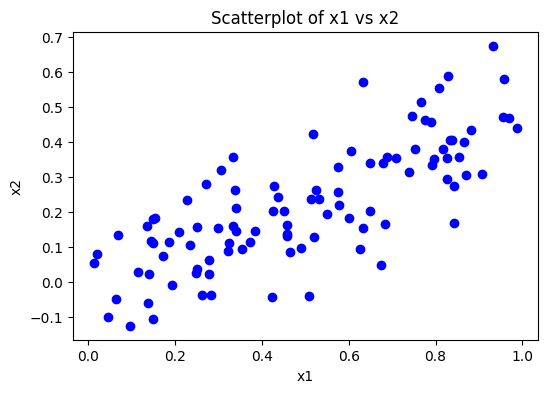

In [2]:
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.3f}")

# Scatterplot to show relationship between x1 and x2
plt.figure(figsize=(6, 4))
plt.scatter(x1, x2, color='blue')
plt.title("Scatterplot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


##(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hatβ_0$, $\hatβ_1$, and $\hatβ_2$? How do these relate to the true $β_0$, $β_1$, and $β_2$? Can you reject the null hypothesis $H_0 : \beta_1 =0$? How about the null hypothesis $H_0 : \beta_2 =0$?

In [3]:
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Extract estimated coefficients
beta_hat_0 = results.params[0]
beta_hat_1 = results.params[1]
beta_hat_2 = results.params[2]

print("\nEstimated coefficients:")
print(f"β̂0 = {beta_hat_0:.3f}")
print(f"β̂1 = {beta_hat_1:.3f}")
print(f"β̂2 = {beta_hat_2:.3f}")

# Hypothesis testing
p_value_beta1 = results.pvalues[1]
p_value_beta2 = results.pvalues[2]
print("\nHypothesis testing:")
print(f"p-value for β1 = 0: {p_value_beta1}")
print(f"p-value for β2 = 0: {p_value_beta2}")


alpha = 0.05  # Significance level

# Conclusion based on p-values
print("\nConclusions:")
if p_value_beta1 < alpha:
    print("Reject the null hypothesis for β1.")
    print("There is evidence that β1 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β1.")
    print("There is not enough evidence to conclude that β1 is different from 0.")
print()
if p_value_beta2 < alpha:
    print("Reject the null hypothesis for β2.")
    print("There is evidence that β2 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β2.")
    print("There is not enough evidence to conclude that β2 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        12:23:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

##(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 =0$??

In [4]:
# Fit least squares regression using only x1
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1)
results_x1 = model_x1.fit()

print(results_x1.summary())

# Extract estimated coefficients
beta_hat_0_x1 = results_x1.params[0]
beta_hat_1_x1 = results_x1.params[1]

print("\nEstimated coefficients (using only x1):")
print(f"β̂0 = {beta_hat_0_x1:.3f}")
print(f"β̂1 = {beta_hat_1_x1:.3f}")

# Hypothesis testing for β1
p_value_beta1_x1 = results_x1.pvalues[1]
print("\nHypothesis testing (using only x1):")
print(f"p-value for β1 = 0: {p_value_beta1_x1}")


alpha = 0.05  # Significance level

# Conclusion based on p-value
print("\nConclusions (using only x1):")
if p_value_beta1_x1 < alpha:
    print("Reject the null hypothesis for β1.")
    print("There is evidence that β1 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β1.")
    print("There is not enough evidence to conclude that β1 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        12:24:09   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

##(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 =0$??

In [5]:
# Fit least squares regression using only x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2)
results_x2 = model_x2.fit()

print(results_x2.summary())

# Extract estimated coefficients
beta_hat_0_x2 = results_x2.params[0]
beta_hat_2_x2 = results_x2.params[1]

print("\nEstimated coefficients (using only x2):")
print(f"β̂0 = {beta_hat_0_x2:.3f}")
print(f"β̂2 = {beta_hat_2_x2:.3f}")

# Hypothesis testing for β2
p_value_beta2_x2 = results_x2.pvalues[1]
print("\nHypothesis testing (using only x2):")
print(f"p-value for β2 = 0: {p_value_beta2_x2}")

alpha = 0.05  # Significance level

# Conclusion based on p-value
print("\nConclusions (using only x2):")
if p_value_beta2_x2 < alpha:
    print("Reject the null hypothesis for β2.")
    print("There is evidence that β2 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β2.")
    print("There is not enough evidence to conclude that β2 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        12:25:19   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

##(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results from the models contradict each other:

- Model (c): When both x1 and x2 are included, β1 has a p-value of 0.0028 (significant), but β2's p-value is 0.2594 (not significant).
- Model (d): For x1 alone, the p-value is 0.0000 (significant).
- Model (e): For x2 alone, the p-value is also 0.0000 (significant).

This shows that x2 is significant on its own but loses significance when x1 is included, and vice versa. This indicates multicollinearity between x1 and x2, where their combined inclusion inflates standard errors and reduces the significance of one another’s coefficients.

## (g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [6]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [7]:
# Re-fit model (c)
X = sm.add_constant(np.column_stack((x1, x2)))
model_g = sm.OLS(y, X)
results_g = model_g.fit()
print(results_g.summary())

# Re-fit model (d)
X_x1 = sm.add_constant(x1)
model_g_x1 = sm.OLS(y, X_x1)
results_g_x1 = model_g_x1.fit()
print(results_g_x1.summary())

# Re-fit model (e)
X_x2 = sm.add_constant(x2)
model_g_x2 = sm.OLS(y, X_x2)
results_g_x2 = model_g_x2.fit()
print(results_g_x2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        12:56:13   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [8]:
def perform_hypothesis_test(results, variable_index, alpha=0.05):
    p_value = results.pvalues[variable_index]
    if p_value < alpha:
        return f"Reject the null hypothesis. p-value = {p_value}"
    else:
        return f"Fail to reject the null hypothesis. p-value = {p_value}"

print("Model with both x1 and x2:")
print(f"Hypothesis test for β1: {perform_hypothesis_test(results_g, 1)}")
print(f"Hypothesis test for β2: {perform_hypothesis_test(results_g, 2)}")

print("\nModel with only x1:")
print(f"Hypothesis test for β1: {perform_hypothesis_test(results_g_x1, 1)}")

print("\nModel with only x2:")
print(f"Hypothesis test for β2: {perform_hypothesis_test(results_g_x2, 1)}")


Model with both x1 and x2:
Hypothesis test for β1: Fail to reject the null hypothesis. p-value = 0.06904442110548373
Hypothesis test for β2: Reject the null hypothesis. p-value = 0.0017617099217751874

Model with only x1:
Hypothesis test for β1: Reject the null hypothesis. p-value = 9.232532667271596e-07

Model with only x2:
Hypothesis test for β2: Reject the null hypothesis. p-value = 3.127972604875945e-08



New models

Model with both x1 and x2:


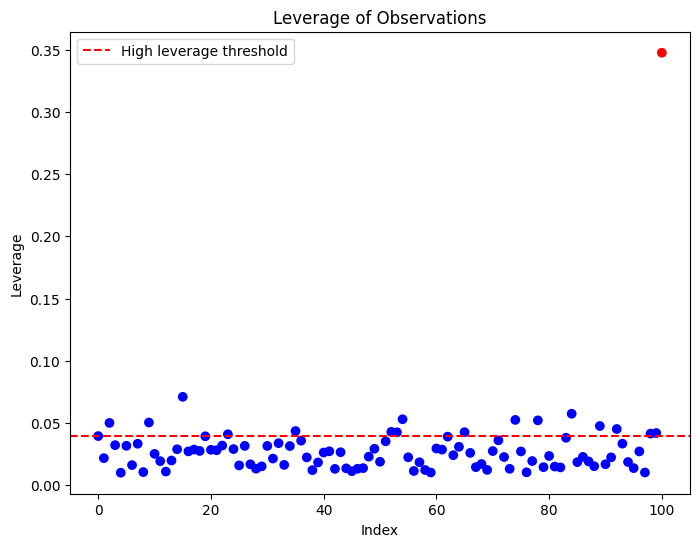


Model with only x1:


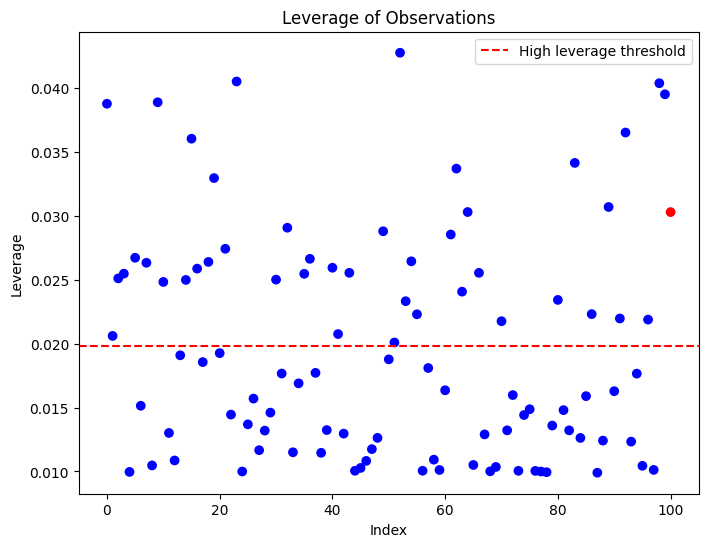


Model with only x2:


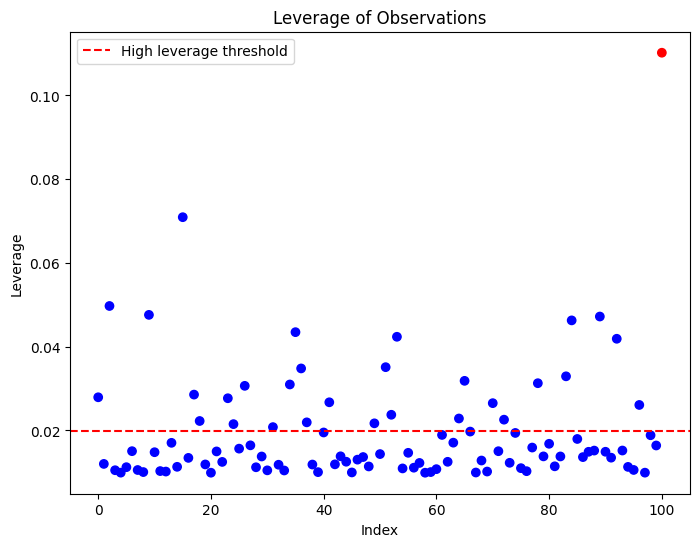

New observation is likely an outlier and has high leverage.


In [13]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def analyze_new_observation_effect(results):
  influence = OLSInfluence(results)
  dfbetas = influence.dfbetas
  dffits = influence.dffits
  cook_distance = influence.cooks_distance[0]
  leverage = influence.hat_matrix_diag


  fig, ax = plt.subplots(figsize=(8, 6))
  colors = ['blue'] * (len(leverage) - 1) + ['red']  # Mark last observation in red

  ax.scatter(np.arange(len(leverage)), leverage, color=colors)
  ax.set_xlabel('Index')
  ax.set_ylabel('Leverage')
  ax.set_title('Leverage of Observations')
  ax.axhline(y=2 * results.df_model / len(y), color='r', linestyle='--', label='High leverage threshold')
  ax.legend()
  plt.show()

  # Return the necessary values
  return dfbetas, dffits, cook_distance, leverage


print("\nNew models")
print("\nModel with both x1 and x2:")
dfbetas_g, dffits_g, cook_distance_g, leverage_g = analyze_new_observation_effect(results_g) # Store the returned values
print("\nModel with only x1:")
dfbetas_x1, dffits_x1, cook_distance_x1, leverage_x1 = analyze_new_observation_effect(results_g_x1) # Store the returned values
print("\nModel with only x2:")
dfbetas_x2, dffits_x2, cook_distance_x2, leverage_x2 = analyze_new_observation_effect(results_g_x2) # Store the returned values


# Use the stored values for the analysis
if np.abs(dffits_g[-1]) > 2 * np.sqrt(results_g.df_model / len(y)): # Use the appropriate results_g
  print("New observation is likely an outlier and has high leverage.")
elif np.max(np.abs(dfbetas_g[-1])) > 1: # Use the appropriate dfbetas_g
  print("New observation has high leverage and can influence the model.")
elif cook_distance_g > 1: # Use the appropriate cook_distance_g
  print("New observation has high influence on the model.")
else:
  print("New observation doesn't seem to be an outlier or have high leverage.")

#Ch3 q15
This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

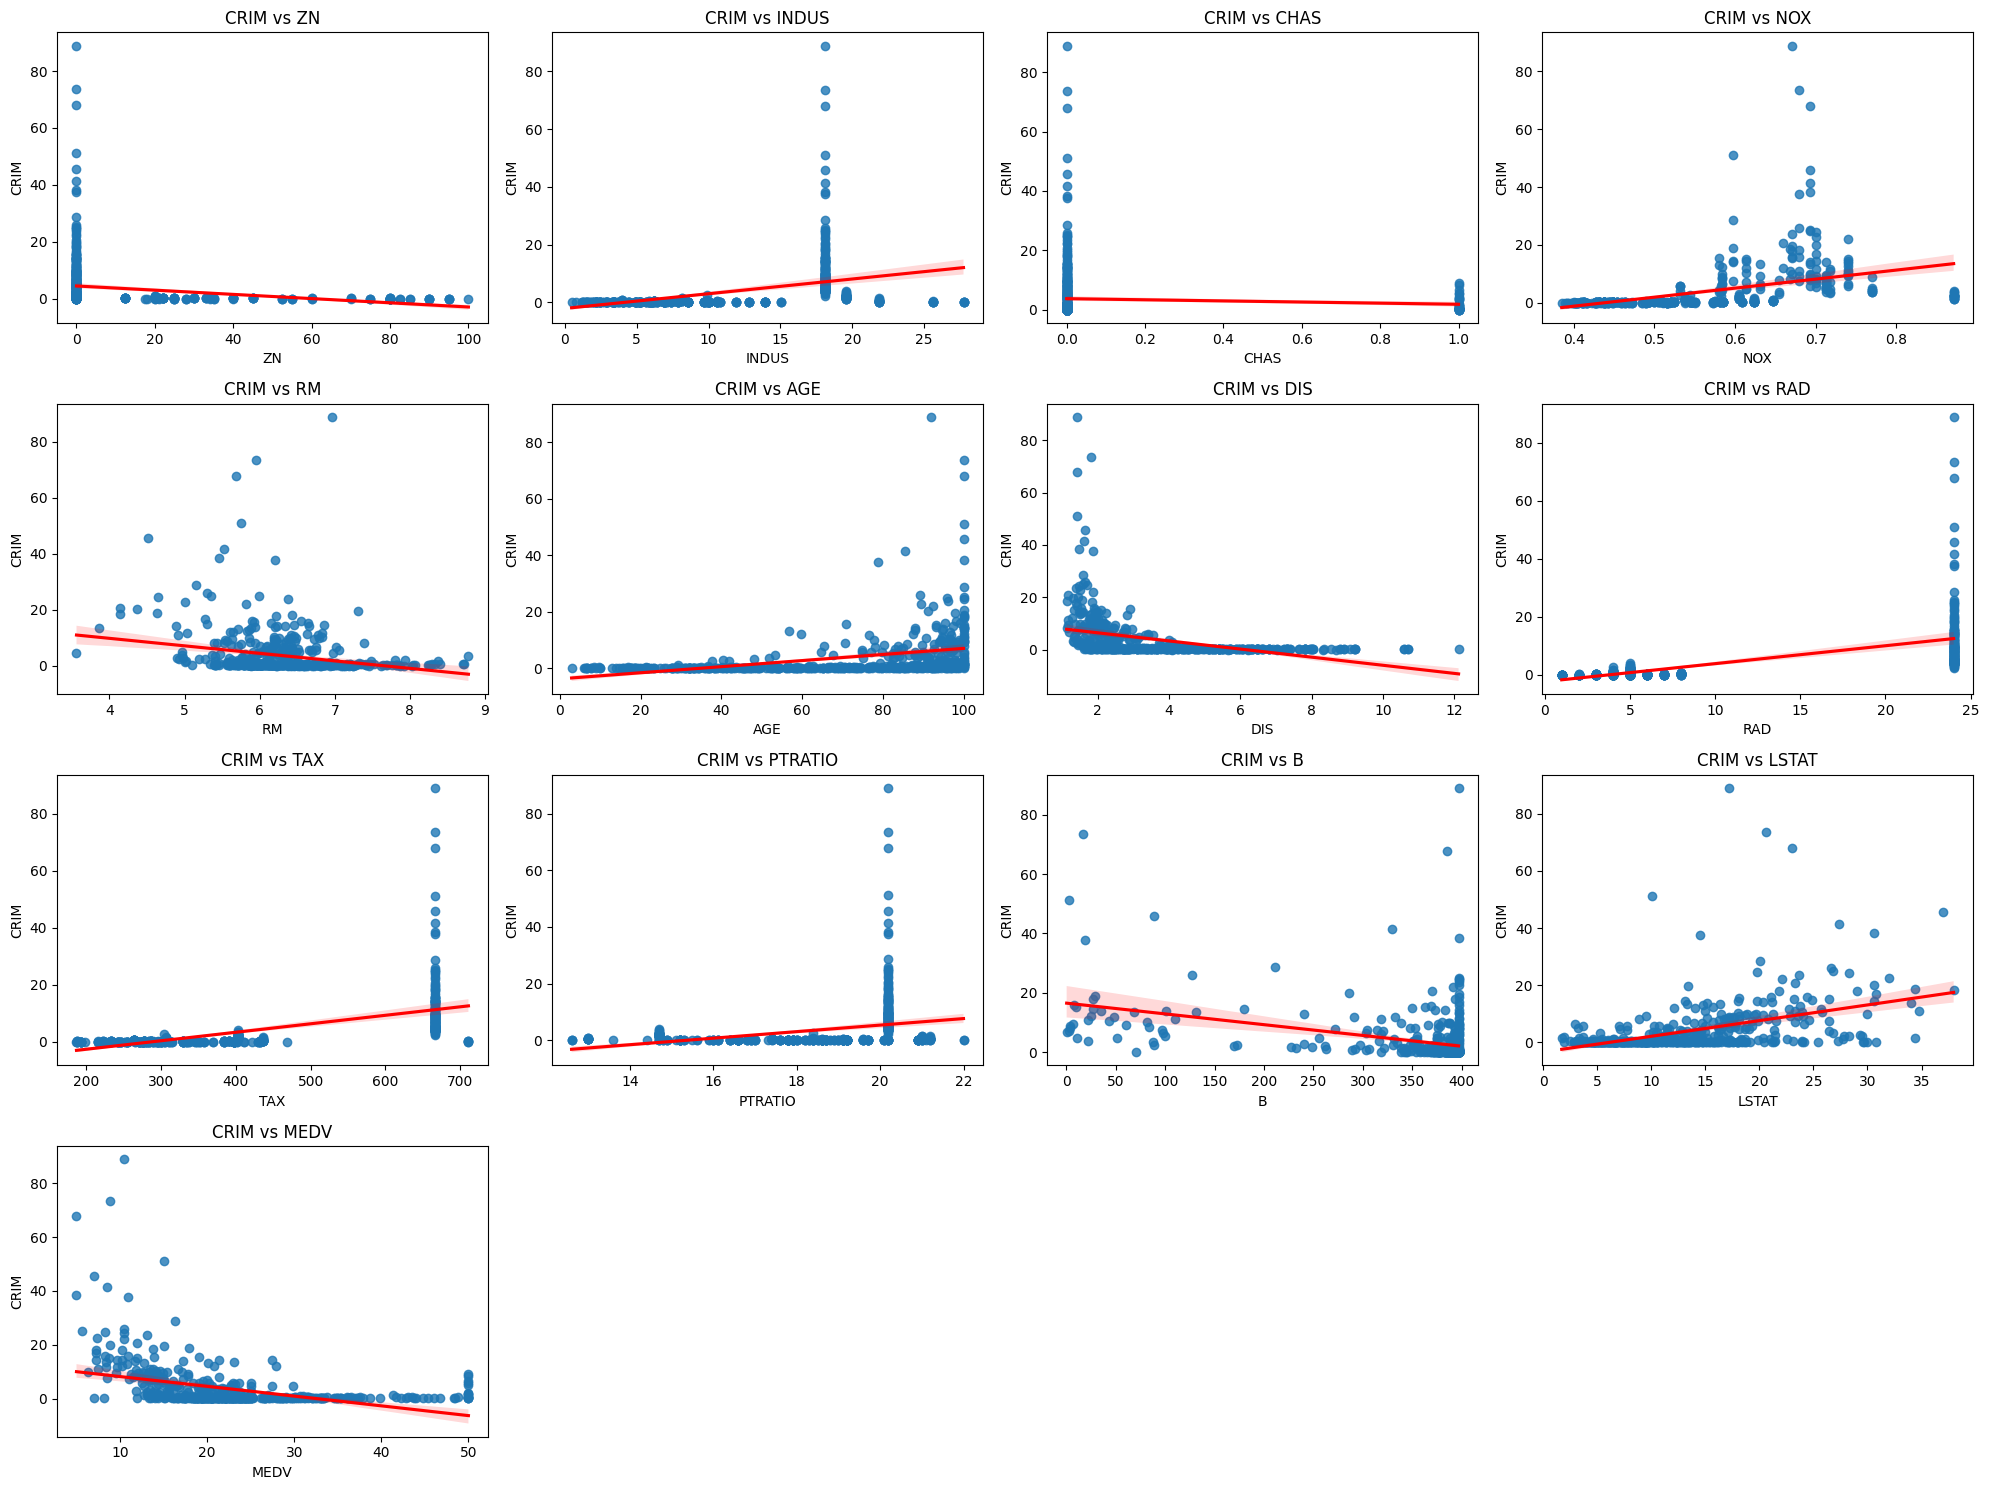

In [ ]:
vimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset from the UCI machine learning repository
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# Process the raw data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])  # Combine rows
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=columns)

# Plot settings
num_predictors = len(df.columns[1:])  # Number of predictors
rows = 4  # Define number of rows
cols = 4  # Define number of columns

# Create a figure and axes with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figure size accordingly
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each predictor and create the plot
for i, predictor in enumerate(df.columns[1:]):  # Exclude 'CRIM' (response variable)
    sns.regplot(x=predictor, y='CRIM', data=df, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'CRIM vs {predictor}')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('CRIM')

# Remove any empty subplots (if there are fewer predictors than rows*cols)
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In this analysis, fit simple linear regression models for each predictor in the Boston dataset to predict the per capita crime rate (CRIM). The scatter plots with red regression lines show varying relationships:

Positive Relationships: Predictors like AGE and NOX show a positive correlation with CRIM, meaning higher values are associated with higher crime rates.

Negative Relationships: Predictors like RM and DIS exhibit negative correlations, suggesting that higher values are linked to lower crime rates.

##(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H0 : \beta_j = 0$?

In [ ]:
import statsmodels.api as sm

# Define the response variable (CRIM) and predictor variables (all other variables)
X = df.drop(columns=['CRIM'])  # Exclude 'CRIM' from the predictors
y = df['CRIM']                 # Response variable is 'CRIM'

# Add a constant term to the predictors to include an intercept in the model
X_const = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.57e-56
Time:                        10:55:53   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

Predictors for Which We Reject the Null Hypothesis $$ H_0: \beta_j = 0 $$

We reject the null hypothesis for the following predictors because their p-values are less than 0.05. These predictors have a significant effect on the response variable CRIM (per capita crime rate):

ZN (Proportion of residential land zoned for large lots) → p-value = 0.017

DIS (Weighted distances to Boston employment centers) → p-value = 0.001

RAD (Accessibility to radial highways) → p-value = 0.000

B (Proportion of Black residents in the town) → p-value = 0.041

MEDV (Median value of owner-occupied homes) → p-value = 0.001


## (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor
<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor
<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(m

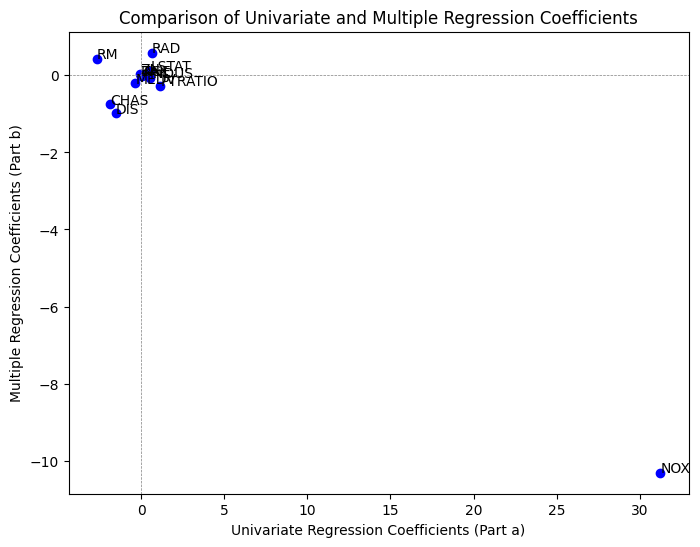

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset from the UCI machine learning repository
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# Process the raw data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])  # Combine rows
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=columns)

# Step 1: Fit univariate (simple) regression models and collect the coefficients
univariate_coefs = []

# Loop through each predictor, excluding 'CRIM' (the response variable)
for predictor in df.columns[1:]:  # Skip the response variable 'CRIM'
    X = df[[predictor]]
    y = df['CRIM']
    X_const = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X_const).fit()
    univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor

# Step 2: Fit the multiple regression model
X = df.drop(columns=['CRIM'])  # All columns except 'CRIM'
y = df['CRIM']                 # Response variable is 'CRIM'

# Add a constant to the predictors for the intercept
X_const = sm.add_constant(X)

# Fit the multiple regression model
multiple_model = sm.OLS(y, X_const).fit()

# Extract coefficients from the multiple regression model (skip the intercept)
multiple_coefs = multiple_model.params[1:]

# Step 3: Plot univariate vs multiple regression coefficients
plt.figure(figsize=(8, 6))
plt.scatter(univariate_coefs, multiple_coefs, color='blue')

# Add labels and title
plt.xlabel('Univariate Regression Coefficients (Part a)')
plt.ylabel('Multiple Regression Coefficients (Part b)')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')

# Add labels to each point for clarity
for i, predictor in enumerate(df.columns[1:]):  # Skipping 'CRIM'
    plt.text(univariate_coefs[i], multiple_coefs[i], predictor)

# Display the plot
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


##(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $$


In [ ]:
import statsmodels.api as sm

# Function to fit the polynomial model for a predictor
def fit_polynomial_regression(predictor):
    # Create the polynomial terms: X, X^2, X^3
    X = df[[predictor]]
    X['X^2'] = X[predictor] ** 2
    X['X^3'] = X[predictor] ** 3
    y = df['CRIM']

    # Add a constant (intercept term)
    X_const = sm.add_constant(X)

    # Fit the polynomial regression model
    model = sm.OLS(y, X_const).fit()

    return model

# Store the results
polynomial_results = {}

# Loop through each predictor and fit the polynomial regression
for predictor in df.columns[1:]:  # Exclude 'CRIM' (response variable)
    model = fit_polynomial_regression(predictor)
    polynomial_results[predictor] = model
    # Display the summary of the model for each predictor
    print(f"Polynomial Regression for {predictor}")
    print(model.summary())
    print("\n")


<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^2'] = X[predictor] ** 2
<ipython-input-3-6512fd306231>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^3'] = X[predictor] ** 3
<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Polynomial Regression for ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        14:18:43   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461  

<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^2'] = X[predictor] ** 2
<ipython-input-3-6512fd306231>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^3'] = X[predictor] ** 3
<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.45e-59
Time:                        14:18:43   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1655      3.356     15.840      0.0

Evidence of Non-linear Association: The predictors ZN, NOX, DIS, B, and LSTAT show evidence of non-linear association with CRIM, as their quadratic or cubic terms are statistically significant.

No Evidence of Non-linearity: Predictors like INDUS, CHAS, RM, AGE, RAD, TAX, PTRATIO, and MEDV do not show any evidence of a non-linear relationship with CRIM.